### Gaurav Sahu

##### githublink: https://github.com/GauravSahu13






# Feature Engineering

## 1) Data Cleaning:

### 1.1) Handling Missing Values:
Missing values are common in real-world datasets and can adversely affect model performance. Imputation techniques like mean, median, or mode replacement can be used to fill missing values. More advanced techniques include KNN imputation, which estimates missing values based on the values of the nearest neighbors.

##### Why are their Missing values?

- Data Entry Errors,Non-Response-hesitate to put down the information (eg: Men--salary / Women---age)


#### What are the different types of Missing Data?

##### (i) Missing Completely at Random( MCAR)
- In this scenario, the probability of a value being missing is unrelated to the observed or missing data. It occurs randomly throughout the dataset, and there is no systematic pattern to the missingness.
- Example: A survey where participants fail to answer certain questions due to accidental oversight.

##### (ii) Missing Data Not At Random(MNAR)
- The missingness is related to the missing values themselves, even after considering observed data. This type of missingness is more challenging to handle because it implies that the missing data is systematically different from the observed data.
- Example: In a survey on income where high-income individuals are less likely to disclose their income, the missingness of income data may be related to the income level itself.

##### (iii) Missing At Random(MAR)
- The probability of a value being missing depends only on the observed data and not on the missing data itself. In other words, the missingness can be explained by other variables in the dataset
- Example: In a survey where income information is missing for unemployed individuals, the missingness of income may be related to employment status (an observed variable).


### Techniques of handling missing values:
- Mean/Median/Mode replacement
- Random Sample Imputation
- Capturing NAN values with a new feature
- End of Distribution Imputation
- Arbitrary Imputation
- Frequent Categories Imputation



### 1.2) Outlier Detection and Treatment: 
Outliers are data points that significantly differ from other observations in the dataset. They can distort statistical analyses and machine learning models. Techniques for handling outliers include truncation (replacing outliers with a specified threshold), winsorization (replacing outliers with the nearest non-outlier value), or removing them altogether if they are deemed erroneous.

#### Dataset link: https://github.com/GauravSahu13/EDA/tree/Feature_Enginerring

In [133]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading CSV file from local
df = pd.read_csv(r'C:\Users\Gaurav\Downloads\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# finding null value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- here features 'Age', 'Cabin', 'Embarked' have 177, 687 & 2 missing values respectively  


##### Age and Cabin are related to each other so it is an example of Missing Data Not At Random(MNAR)
##### Embarked is not related to any other feature so it is an example of Missing Data At Random(MAR)

In [5]:
# Nan values replace by '1' & not nan value with '0'

df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
# find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

- feature cabin has 77% of null value

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [7]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

- 60% missing value of Cabin ---> Survived
- 87% missing value of Cabin ---> Not Survived

### (i) Mean-Median-Mode Replacement

##### When should we apply? 
- We solve this by replacing the NAN value with the most frequent occurance of the variables

##### Advantages
- Easy to Implement(robust to outliers)
- Faster way to obtain the complete dataset

##### Disadvantages
- Change or Distortion in the original variance
- Impacts Correlation

In [135]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

- Age has 19.8% missing value

##### filling nan value with median of the data

In [141]:
median=df.Age.median()
median
# for feature Age median is 28

28.0

In [143]:
def impute_nan(df,feature,median):
    df[feature+"_median"]=df[feature].fillna(median)
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [145]:
print(df['Age'].std())
# after replacement nan value
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


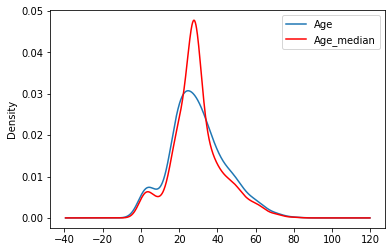

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

- Blue line represents feature 'Age' with nan value
- Red line represents feature 'Age' with not nan value

### (ii) Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

##### When should it be used?
- It assumes that the data are missing completely at random(MCAR)

##### Advantages
- There is less distortion in variance

##### Disadvantages
- Every situation randomness wont work

In [146]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [147]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
dtype: int64

In [149]:
df['Age'].isnull().sum()

177

In [164]:
# dropping all the nan value
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

- values randomly replace by another value (eg 423 replace by 28) 

In [165]:
df[df['Age'].isnull()].index
# getting index of nan value

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [170]:
median=df.Age.median()
def impute_nan(df,feature,median):
    df[feature+"_median"]=df[feature].fillna(median)
    df[feature+"_random"]=df[feature]
    ##It will have the random sample to fill the na
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature+'_random']=random_sample

impute_nan(df,"Age",median)
df.head(20)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


- As we can see Nan value of index 5,17,19 replace by random values (28,50,0.92)

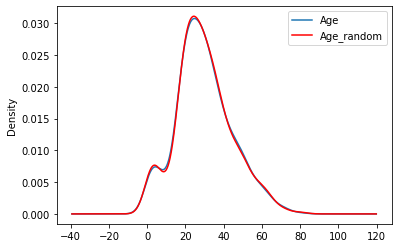

In [176]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

- here distortion is less compare to median graph

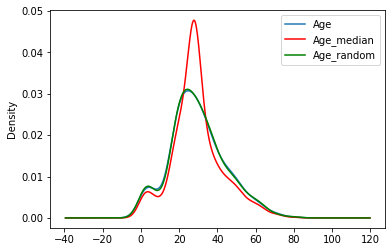

In [177]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### (iii) Capturing NAN values with a new feature

It works well if the data are not missing completely at random

#####  Advantages
- Easy to implement
- Captures the importance of missing values

##### Disadvantages
- Creating Additional Features(Curse of Dimensionality)

In [178]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [179]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_median,Age_random,Age_NAN
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0


In [180]:
df.Age.median()

28.0

In [181]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [182]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_random,Age_NAN
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0
5,0,28.0,8.4583,28.0,28.0,1
6,0,54.0,51.8625,54.0,54.0,0
7,0,2.0,21.0750,2.0,2.0,0
8,1,27.0,11.1333,27.0,27.0,0
9,1,14.0,30.0708,14.0,14.0,0


- NaN value replace by '1' & not NaN by '0'

### (iv) End of Distribution imputation

- In this method we replace missing values with far end values or extreme
- Far end value means the values after 3rd standard deviation

##### Advantages
- Easy to implement & Captures the importance of missing values 

##### Disadvantages 
- Distorts the original distribution of the variable.
- If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution.
- If number of NA is big, it will mask true outliers in the distribution


In [190]:
df1=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

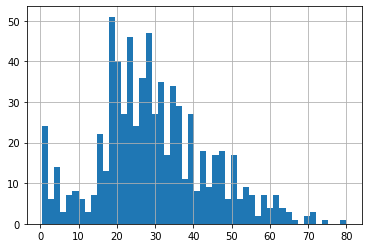

In [191]:
df1.Age.hist(bins=50)

In [192]:
extreme=df1.Age.mean()+3*df1.Age.std()

<Axes: xlabel='Age'>

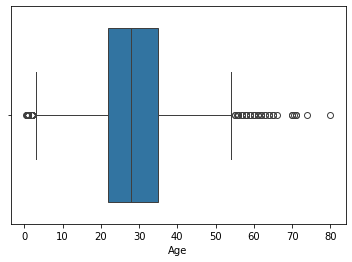

In [193]:
import seaborn as sns
sns.boxplot(x='Age',data=df)

In [194]:
def impute_nan(df1,variable,median,extreme):
    df1[variable+"_end_distribution"]=df1[variable].fillna(extreme)
    df1[variable].fillna(median,inplace=True)
    
impute_nan(df1,'Age',df1.Age.median(),extreme)
df1.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


- In Index 5 Nan value with extreme value(73.27)

<Axes: >

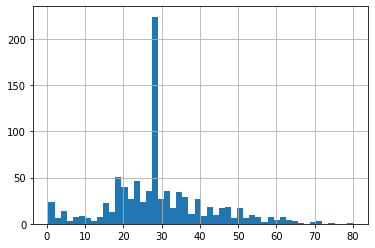

In [195]:
df1['Age'].hist(bins=50)

<Axes: >

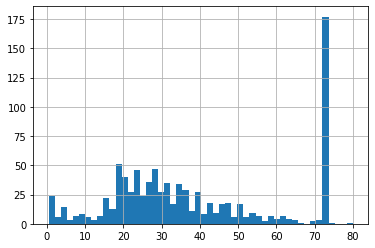

In [196]:
df1['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

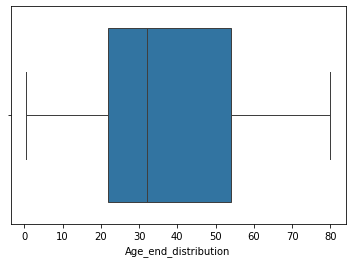

In [197]:
sns.boxplot(x ='Age_end_distribution',data=df1)

### (v) Arbitrary Value Imputation

This technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

##### Advantages
- Easy to implement
- Captures the importance of missingess if there is one

##### Disadvantages
- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use


In [200]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

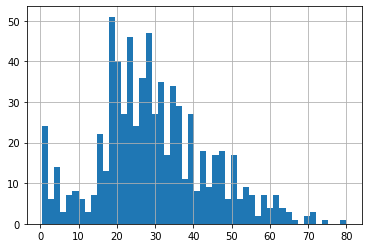

In [201]:
### Arbitrary values ---> It should be more frequently present
df['Age'].hist(bins=50)

In [205]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
impute_nan(df,'Age')
df.head(10)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


- Arbitrary value as 100

### (vi) Frequent categories imputation

In [206]:
loan =pd.read_csv(r'C:\Users\Gaurav\Desktop\train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
loan.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [207]:
loan.shape

(1460, 4)

In [220]:
# missing values in categorical features
loan.isnull().sum()

BsmtQual         37
FireplaceQu     690
GarageType       81
SalePrice         0
BsmtQual_Var      0
dtype: int64

In [221]:
# in terms of percentage
loan.isnull().mean().sort_values(ascending=True)

SalePrice       0.000000
BsmtQual_Var    0.000000
BsmtQual        0.025342
GarageType      0.055479
FireplaceQu     0.472603
dtype: float64

#### 1. Compute the frequency with every feature

##### Advantages
- Easy To implement
- Fater way to implement

##### Disadvantages
- Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
- It distorts the relation of the most frequent label

<Axes: >

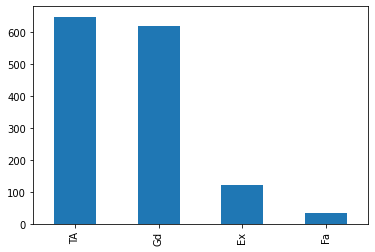

In [222]:
# nan value replace by most freq
loan['BsmtQual'].value_counts().plot.bar()

<Axes: >

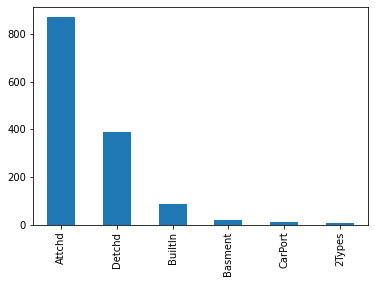

In [211]:
loan['GarageType'].value_counts().plot.bar()

<Axes: >

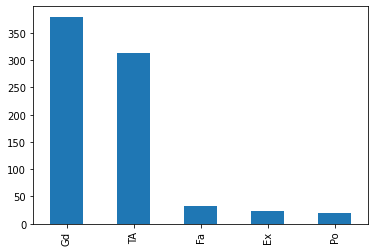

In [212]:
loan['FireplaceQu'].value_counts().plot.bar()

In [213]:
# highest category name in specific variable
loan['GarageType'].value_counts().index[0]
#loan['GarageType'].mode()[0]

'Attchd'

- 'Attchd' is more frequently repeated in feature 'GarageType'

In [214]:
# Replacing Function
def impute_nan(df,variable):
    most_frequent_category=loan[variable].mode()[0]
    loan[variable].fillna(most_frequent_category,inplace=True)

In [215]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(loan,feature)

In [216]:
loan.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### 2. Adding a variable to capture NAN

##### Advantages
- Features have more NaN value

##### Diadvantages
- Increasing Feature space

In [238]:
loan =pd.read_csv(r'C:\Users\Gaurav\Desktop\train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
loan.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [239]:
loan['BsmtQual_Var']=np.where(loan['BsmtQual'].isnull(),1,0)

In [240]:
loan['BsmtQual'].mode()[0]

'TA'

In [241]:
frequent=loan['BsmtQual'].mode()[0]
loan['BsmtQual'].fillna(frequent,inplace=True)
loan.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [242]:
loan['FireplaceQu_Var']=np.where(loan['FireplaceQu'].isnull(),1,0)
frequent=loan['FireplaceQu'].mode()[0]
loan['FireplaceQu'].fillna(frequent,inplace=True)

In [243]:
loan.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0



- Suppose if you have more frequent categories, we just replace NAN with a new category

In [251]:
loan =pd.read_csv(r'C:\Users\Gaurav\Desktop\train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
loan.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [252]:
def impute_nan(df,variable):
    loan[variable+"newvar"]=np.where(loan[variable].isnull(),"Missing",loan[variable])

for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(loan,feature)

- Replacing NaN value by Missing

In [253]:
loan.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [254]:
loan=loan.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
# dropping unnecessary features

In [255]:
loan.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
